## Fetching the data from db

In [2]:
import importlib
import utils2

importlib.reload(utils2)
from utils2 import *

In [3]:
all_data = aggregate_joular_node_entity_by_value("spring-boot",25)

## Outliers removal and distribution of all the values

Removing all outliers from the data, using the z-score method

In [4]:
all_data_without_outliers = removeOutliers(all_data)

Len with outliers :  216
Len without outliers (with at least 25 values) :  204


### Shapiro-Wilk test

Testing all data without outliers to see which ones follow a normal distribution and which ones do not.

In [5]:
all_normal_data_without_outliers = removeNonNormalData(all_data_without_outliers)

Number of normal distributions :  110


### Boxplot of the normal distributions without outliers

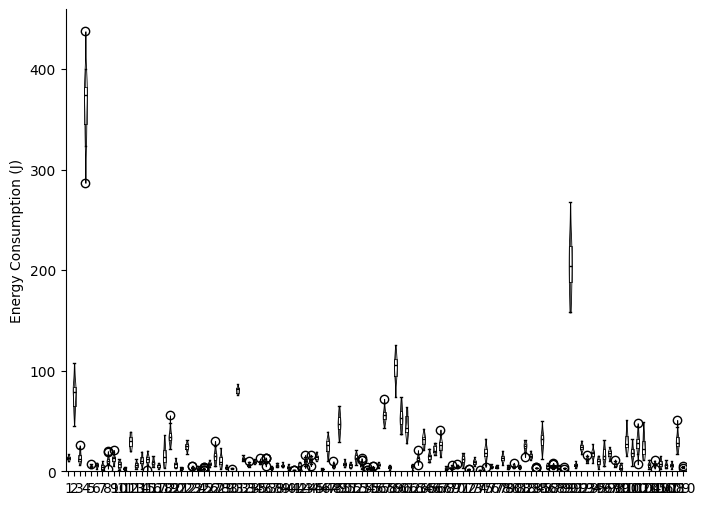

In [6]:
normal_values = [doc["values"] for doc in all_normal_data_without_outliers]
#labels = [doc["measurableElement"]["classMethodSignature"] for doc in all_normal_data_without_outliers]
violin_and_boxplot(normal_values)

There are no ancestors :/
org.springframework.boot.testsupport.classpath.ModifiedClassPathClassLoader.loadClass 88



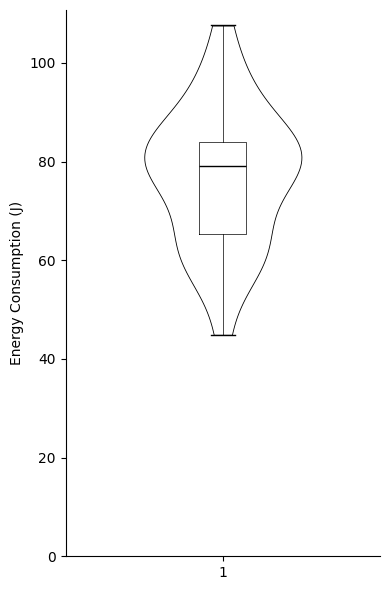

org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptTestMethod 76
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.interceptMethod 103
org.springframework.boot.testsupport.classpath.ModifiedClassPathExtension.runTest 113



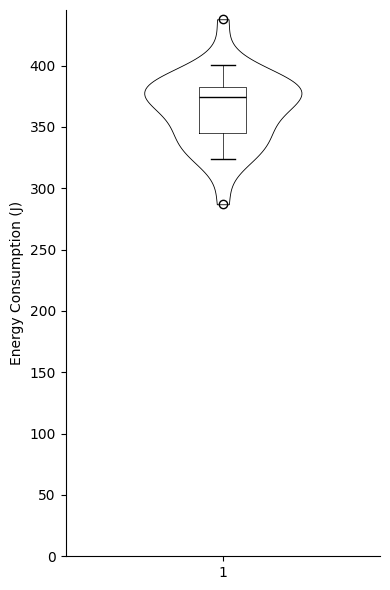

org.springframework.boot.AbstractApplicationEnvironmentTests.propertyResolverIsOptimizedForConfigurationProperties 59
org.springframework.boot.ApplicationEnvironmentTests.createEnvironment 30
org.springframework.boot.ApplicationEnvironment.<init> 29



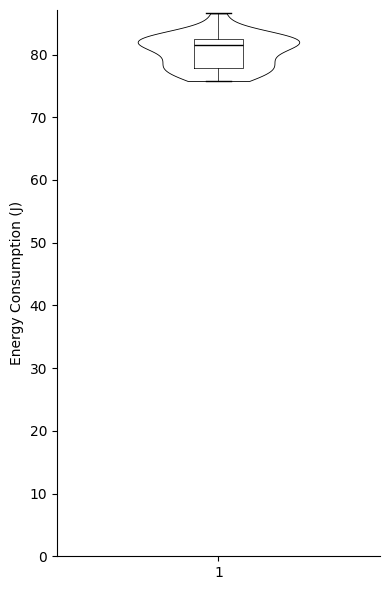

There are no ancestors :/
org.springframework.boot.jdbc.EmbeddedDatabaseConnectionTests.isEmbeddedWithDerbyDataSource 110



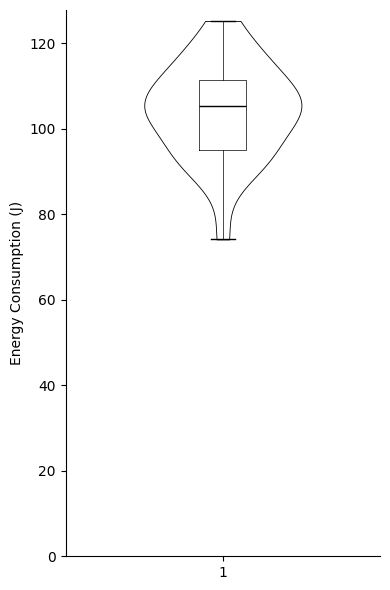

There are no ancestors :/
org.springframework.boot.web.embedded.undertow.UndertowServletWebServerFactoryTests.awaitClosureOfSslRelatedInputStreams 82



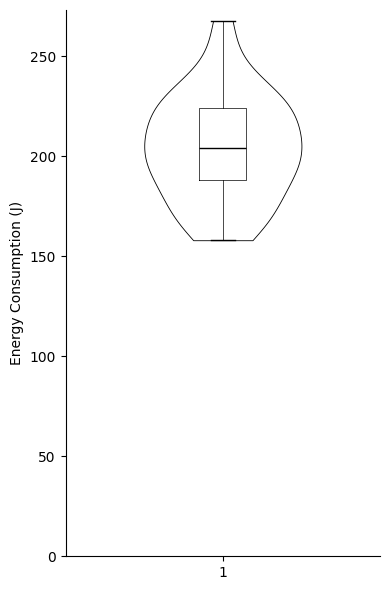

/home/jerome/Documents/Assistant/Recherche/joular-scripts/sentinel-notebook/utils2.py:280: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


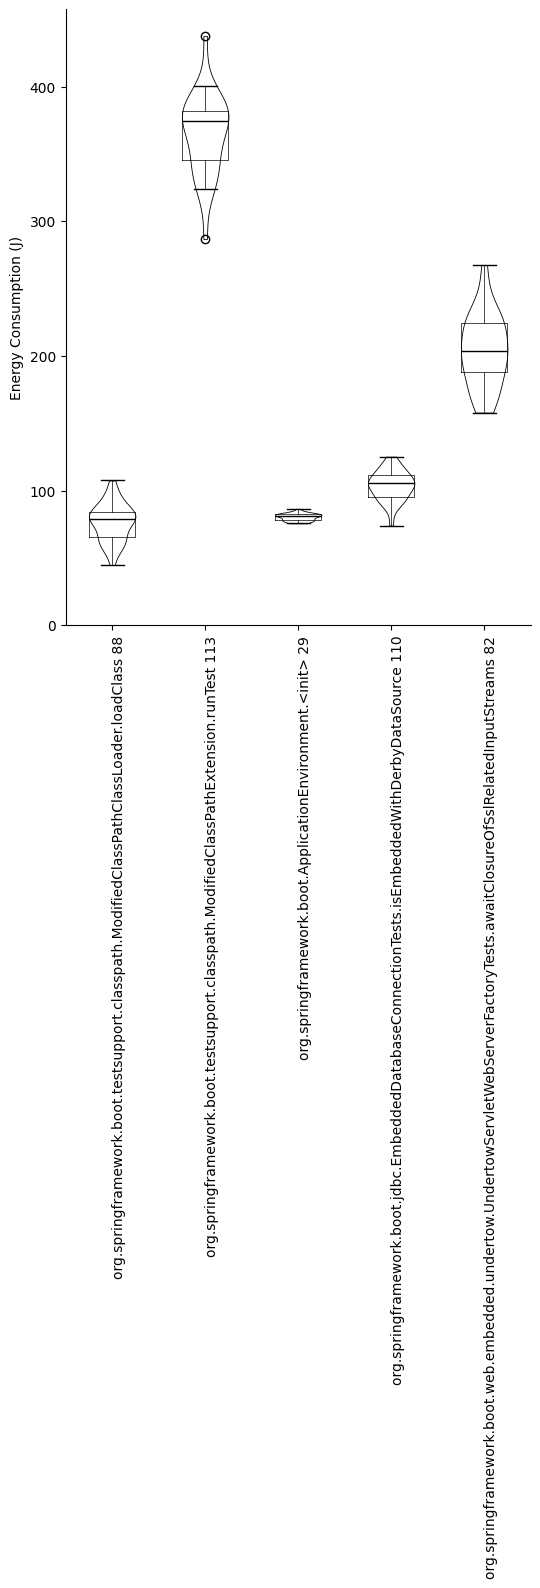

In [37]:
import importlib
import utils2
importlib.reload(utils2)
from utils2 import *


all_project_means = mean_dict(all_normal_data_without_outliers)
#violin_and_boxplot(all_project_means)
highest_quantile = filter_highest_data(all_normal_data_without_outliers, all_project_means, 4)
first_quartile_values = [doc["values"] for doc in highest_quantile]
labels = [doc["measurableElement"]["classMethodSignature"] + " " + str(doc["lineNumber"]) for doc in highest_quantile]

for doc in highest_quantile:
    label = f'{doc["measurableElement"]["classMethodSignature"]} {doc["lineNumber"]}'
    get_ancestors_from_joular_node_entity_id(doc["id"])
    violin_and_boxplot(doc["values"], bottom=0, height=4, width=6, save_path=label)

violin_and_boxplot(first_quartile_values, labels=labels, bottom=0)